# Basic Spatial Operations
En esta seccion analizaremos algunas operaciones espaciales basicas.

In [1]:
import os
os.environ['HTTP_PROXY']=""
os.environ['HTTPS_PROXY']=""

## Change coordinate reference system (CRS)
El tipo de coordenadas más conocido son las coordenadas geográficas: definimos una posición en el globo en grados de latitud y longitud, en relación con el ecuador y el meridiano principal. Con este sistema, podemos especificar fácilmente cualquier ubicación en la tierra. Se usa ampliamente, por ejemplo en GPS (48°51′N, 2°17′E).

Recordar que en python usamos (lon, lat) y no (lat, lon). Longitude:[-180, 180] Latitude:[-90, 90]

Al proyectar la superficie de la tierra en un plano 2D para poder expresar ubicaciones en coordenadas cartesianas (x, y), en una superficie plana. En este plano, normalmente trabajamos con una unidad de longitud como metros en lugar de grados, lo que hace que el análisis realista a las unidades en las que estamos acostumbrados.

Algunos sistemas de proyección intentarán preservar el tamaño del área de las geometrías, como la proyección Albers Equal Area. Otros sistemas de proyección intentan preservar los ángulos, como la proyección de Mercator, pero verán grandes distorsiones en el área. Cada sistema de proyección siempre tendrá alguna distorsión de área, ángulo o distancia.

In [2]:
import geopandas as gpd
 
file = 'https://opendata.arcgis.com/datasets/c7e7f35d18f54cad9f68b9a8fed50819_0.zip'
gdf_comercio = gpd.read_file(file)
gdf_comercio.head()

,FID,Nombre,lat,lon,cp,telefono,direccion,poi_type,ID_SHOP,SOURCE,geometry
0,1,Viajes Eroski AMARA,43.3035,-1.97597,20011 Donostia-San Sebastian,Tel. 94 34 54 69 0,"Avda Madrid, 24",supermarket,601,web,POINT (-1.97597 43.30350)
1,2,Spar SPAR,43.2319,-2.85011,None,None,"CALLE URRETA, 18 GALDAKAO",supermarket,801,web,POINT (-2.85011 43.23190)
2,3,Eroski Center Trapagaran,43.3034,-3.03819,48510 Trapagaran,Tel. 94 49 23 40 0,Jose Rufino Olaso,supermarket,602,web,POINT (-3.03819 43.30340)
3,4,Viajes Eroski Galdakao,43.2312,-2.84279,48960 Galdakao,Tel. 94 45 70 11 7,"Zamakoa, 5",supermarket,802,web,POINT (-2.84279 43.23120)
4,5,Viajes Eroski El Valle,43.3034,-3.03649,48510 Trapagaran,Tel. 94 48 62 57 2,"Doctor Mulero, 4",supermarket,603,web,POINT (-3.03649 43.30340)


In [3]:
gdf_comercio.to_crs({'init': 'epsg:32630'}, inplace=True)
gdf_comercio.head()

,FID,Nombre,lat,lon,cp,telefono,direccion,poi_type,ID_SHOP,SOURCE,geometry
0,1,Viajes Eroski AMARA,43.3035,-1.97597,20011 Donostia-San Sebastian,Tel. 94 34 54 69 0,"Avda Madrid, 24",supermarket,601,web,POINT (583055.278 4795027.935)
1,2,Spar SPAR,43.2319,-2.85011,None,None,"CALLE URRETA, 18 GALDAKAO",supermarket,801,web,POINT (512171.241 4786578.325)
2,3,Eroski Center Trapagaran,43.3034,-3.03819,48510 Trapagaran,Tel. 94 49 23 40 0,Jose Rufino Olaso,supermarket,602,web,POINT (496902.556 4794508.455)
3,4,Viajes Eroski Galdakao,43.2312,-2.84279,48960 Galdakao,Tel. 94 45 70 11 7,"Zamakoa, 5",supermarket,802,web,POINT (512765.780 4786501.679)
4,5,Viajes Eroski El Valle,43.3034,-3.03649,48510 Trapagaran,Tel. 94 48 62 57 2,"Doctor Mulero, 4",supermarket,603,web,POINT (497040.436 4794508.393)


In [4]:
from pyproj import Proj, transform

# CRS de origen esta en UTM
inProj =  Proj(init='epsg:32630')
# Queremos convertir a lat,lon
outProj = Proj(init='epsg:4326')
# Projectamos con pyproj
xnew,ynew = transform(inProj,outProj, gdf_comercio.geometry[0].x, gdf_comercio.geometry[0].y)
print (xnew,ynew)

-1.9759699999999611 43.30350000000004


(array('d', [-1.9759699999999611]), array('d', [43.30350000000004]))


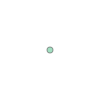

In [39]:
# Si bien shapely no comprende de forma nativa los sistemas de coordenadas, 
# shapely.ops.transform () puede hacerlo junto con pyproj.

from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Point

project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:32630'), 
    pyproj.Proj(init='epsg:4326'))

point_4326 = transform(project, Point(gdf_comercio.iloc[0].geometry))  # apply projection
print (point_4326.xy)
point_4326

## Attribute Joins

Con el metodo merge de geopandas podemos unir dos tablas por un atributo compartido.

In [5]:
import geopandas as gpd
file = 'https://opendata.arcgis.com/datasets/edd9d9758f574110a09649cf997a5892_0.zip'
census_2011 = gpd.read_file(file)    
census_2011.head()

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,T16_1,T17_1,T17_2,T17_3,T18_1,...,T20_9,T22_1,T22_2,T22_3,T22_4,T22_5,T22_6,Shape__Are,Shape__Len,geometry
0,1,01001,Alegría-Dulantzi,01,16,1250.0,1085.0,75.0,95.0,230.0,...,5.0,200.0,340.0,240.0,280.0,20.0,5.0,3.709269e+07,48191.568751,"MULTIPOLYGON (((-2.53469 42.82247, -2.53412 42..."
1,2,01002,Amurrio,01,16,4435.0,3860.0,130.0,440.0,1685.0,...,60.0,720.0,1270.0,985.0,690.0,135.0,60.0,1.799114e+08,90623.621773,"MULTIPOLYGON (((-2.95561 42.98869, -2.95559 42..."
2,3,01003,Aramaio,01,16,680.0,575.0,45.0,55.0,235.0,...,20.0,125.0,190.0,90.0,135.0,25.0,10.0,1.377066e+08,58592.915252,"POLYGON ((-2.52786 43.05149, -2.52783 43.05142..."
3,4,01004,Artziniega,01,16,1120.0,755.0,90.0,275.0,270.0,...,25.0,220.0,225.0,145.0,120.0,45.0,0.0,5.130078e+07,31498.523574,"POLYGON ((-3.10886 43.14338, -3.10887 43.14331..."
4,5,01006,Armiñón,01,16,155.0,90.0,40.0,20.0,10.0,...,10.0,20.0,25.0,30.0,15.0,0.0,0.0,2.380288e+07,33293.805131,"MULTIPOLYGON (((-2.90185 42.69682, -2.90160 42..."


In [6]:
## Cargamos la capa de poblacion estimada por motivo laboral en cada municipio de España
file = 'https://opendata.arcgis.com/datasets/45ecc9278f3d401fb1dc32132e107331_0.zip'
gdf_pop = gpd.read_file(file)
gdf_pop.head()

,OBJECTID,MUNI_COD,n_empr_t,n_empl_emp,n_empr_sed,n_empl_e_1,n_empr_suc,n_empl_e_2,n_empl_cat,n_auto,n_empl_aut,n_empl_poi,n_empl_t,Población,Municipio,Shape__Are,Shape__Len,geometry
0,1,10904,4,48,4,48,0,0,0,7,10,33,91,902.0,Tiétar,4.086384e+07,38098.163614,"POLYGON ((-5.51678 39.99765, -5.51691 39.99793..."
1,2,15006,115,437,75,364,40,73,0,107,156,543,1136,6041.0,Arzúa,2.901367e+08,106422.709442,"POLYGON ((-8.23500 43.00486, -8.23420 43.00486..."
2,3,39085,205,1372,143,910,62,462,77,167,244,577,2270,8782.0,Suances,4.658129e+07,36992.323318,"POLYGON ((-4.09773 43.42650, -4.09760 43.42653..."
3,4,31258,280,1598,171,1092,109,506,0,148,216,604,2418,10204.0,Villava/Atarrabia,1.970603e+06,5716.056102,"POLYGON ((-1.61644 42.83452, -1.61634 42.83895..."
4,5,53081,0,0,0,0,0,0,0,0,0,3,3,NaN,None,1.376677e+08,85638.670838,"POLYGON ((-2.27344 42.74187, -2.27326 42.74299..."


In [7]:
census_2011 = census_2011.rename(columns={'Codigo': 'MUNI_COD'})
gdf_pop_merge = gdf_pop.merge(census_2011, on='MUNI_COD')
gdf_pop_merge.head()

,OBJECTID_x,MUNI_COD,n_empr_t,n_empl_emp,n_empr_sed,n_empl_e_1,n_empr_suc,n_empl_e_2,n_empl_cat,n_auto,...,T20_9,T22_1,T22_2,T22_3,T22_4,T22_5,T22_6,Shape__Are_y,Shape__Len_y,geometry_y
0,1,10904,4,48,4,48,0,0,0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.086438e+07,38089.617789,"POLYGON ((-5.43937 40.01246, -5.43951 40.01258..."
1,2,15006,115,437,75,364,40,73,0,107,...,45.0,235.0,500.0,465.0,325.0,80.0,15.0,2.900440e+08,106376.997651,"POLYGON ((-8.22444 43.00003, -8.22433 42.99996..."
2,3,39085,205,1372,143,910,62,462,77,167,...,25.0,1005.0,1270.0,545.0,605.0,150.0,5.0,4.657166e+07,36283.315663,"POLYGON ((-4.04705 43.44518, -4.04660 43.44507..."
3,4,31258,280,1598,171,1092,109,506,0,148,...,55.0,665.0,790.0,890.0,1145.0,165.0,10.0,2.010362e+06,5822.701131,"POLYGON ((-1.60428 42.83582, -1.60426 42.83581..."
4,6,01004,23,117,19,111,4,6,0,15,...,25.0,220.0,225.0,145.0,120.0,45.0,0.0,5.130078e+07,31498.523574,"POLYGON ((-3.10886 43.14338, -3.10887 43.14331..."


## Spatial join
Partimos de la capa de farmacias y supermercados, para analizar la frecuencia de personas a durante el estados de alarma por COVID.

In [8]:
import geopandas as gpd

file = 'https://opendata.arcgis.com/datasets/9cbc870a893a40ada6cd7b8bcf4cd4e8_0.zip'
gdf_framacia = gpd.read_file(file)
gdf_framacia.head()

,FID,osm_id,code,fclass,name,geometry
0,1,26290220,2101,pharmacy,None,POINT (-3.60503 40.42854)
1,2,26472667,2101,pharmacy,Farmacia - Calle Toledo 53,POINT (-3.70794 40.41170)
2,3,26472668,2101,pharmacy,Farmacia - Calle Nuestra Señora de La Luz 57,POINT (-3.75224 40.38658)
3,4,26835663,2101,pharmacy,Martinez Aguinaga,POINT (-2.06517 42.90688)
4,5,26835664,2101,pharmacy,None,POINT (-2.06529 42.90538)


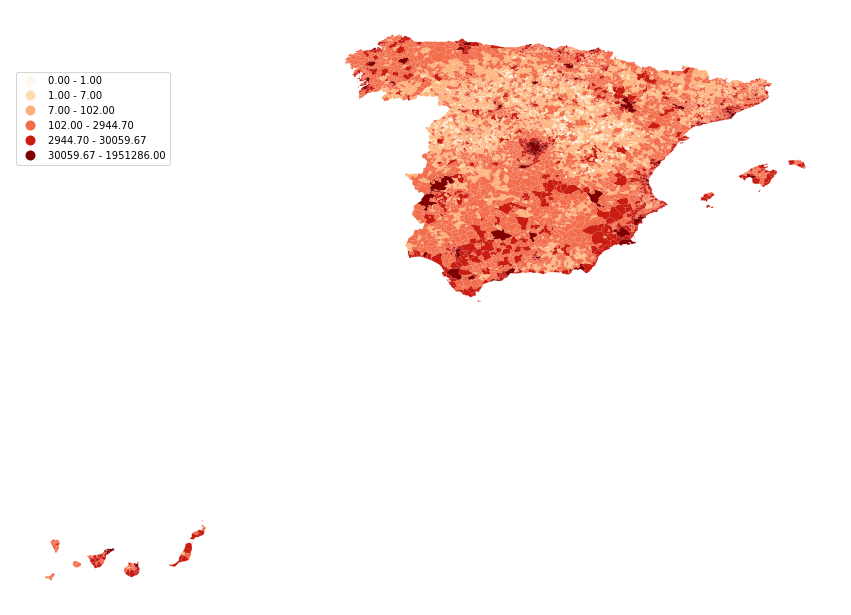

In [9]:
# Unimos espacialmente la capa de poblacion estimada por motivo laboral en cada municipio
ax = gdf_pop.plot(figsize=(15, 15), column='n_empl_t', scheme='percentiles', legend=True, cmap='OrRd')
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.9))
ax.set_axis_off()

La unión espacial, implica una operación geográfica. Realizaremos un ejemplo de una unión espacial entre la capas de las farmacias y la capa de población estimada por municipios. Por ejemplo, qué municipio contiene qué farmacia o qué farmacia se encuentra dentro de qué municipio. Usaremos la función Geopandas .sjoin () para hacer la unión espacial.

In [10]:
gdf_pop_join = gdf_pop[['geometry', 'Municipio', 'n_empl_t']]
gdf_framacia_join = gdf_framacia[['name', 'geometry', 'fclass']]
pop_with_farmacia = gpd.sjoin(gdf_framacia_join, gdf_pop_join, how="inner", op='within')
#Ahora ya tenemos para cada farmacia la población del municipio correspondiente sobre la cual esta localizada.
pop_with_farmacia.head(-1)

,name,geometry,fclass,index_right,Municipio,n_empl_t
0,None,POINT (-3.60503 40.42854),pharmacy,3305,Madrid,1951286
1,Farmacia - Calle Toledo 53,POINT (-3.70794 40.41170),pharmacy,3305,Madrid,1951286
2,Farmacia - Calle Nuestra Señora de La Luz 57,POINT (-3.75224 40.38658),pharmacy,3305,Madrid,1951286
6,Farmacia - Calle Melchor Fernández Almagro 84,POINT (-3.71086 40.47549),pharmacy,3305,Madrid,1951286
7,None,POINT (-3.70698 40.47851),pharmacy,3305,Madrid,1951286
...,...,...,...,...,...,...
13204,None,POINT (-2.95835 40.54429),pharmacy,3657,Tendilla,108
13206,Farmacia Barbero Málaga,POINT (-5.09230 39.28198),pharmacy,7736,Castilblanco,186
13209,Farmacia Ruiz Millán,POINT (-7.28096 38.51191),pharmacy,7742,Cheles,126
13210,Farmacia Barroso Pasalodos,POINT (-7.17291 39.20793),pharmacy,7738,"Codosera, La",180


## Selection 

### Selection by attribute

In [11]:
# Seleccionamos las farmacias con mayor poblacion de empleados en el municipio que se corresponde con el municipio de Madrid
farmacia_madrid= pop_with_farmacia.loc[pop_with_farmacia['n_empl_t'] == pop_with_farmacia['n_empl_t'].max()]
# Tambien podriamso seleccionar los municipios con menos empleados que se corresponden con Gobernador y Berlanga del Bierzo
#armacia_madrid= pop_with_farmacia.loc[pop_with_farmacia['n_empl_t'] == pop_with_farmacia['n_empl_t'].min()]
farmacia_madrid.head()

,name,geometry,fclass,index_right,Municipio,n_empl_t
0,None,POINT (-3.60503 40.42854),pharmacy,3305,Madrid,1951286
1,Farmacia - Calle Toledo 53,POINT (-3.70794 40.41170),pharmacy,3305,Madrid,1951286
2,Farmacia - Calle Nuestra Señora de La Luz 57,POINT (-3.75224 40.38658),pharmacy,3305,Madrid,1951286
6,Farmacia - Calle Melchor Fernández Almagro 84,POINT (-3.71086 40.47549),pharmacy,3305,Madrid,1951286
7,None,POINT (-3.70698 40.47851),pharmacy,3305,Madrid,1951286


### Selection by location

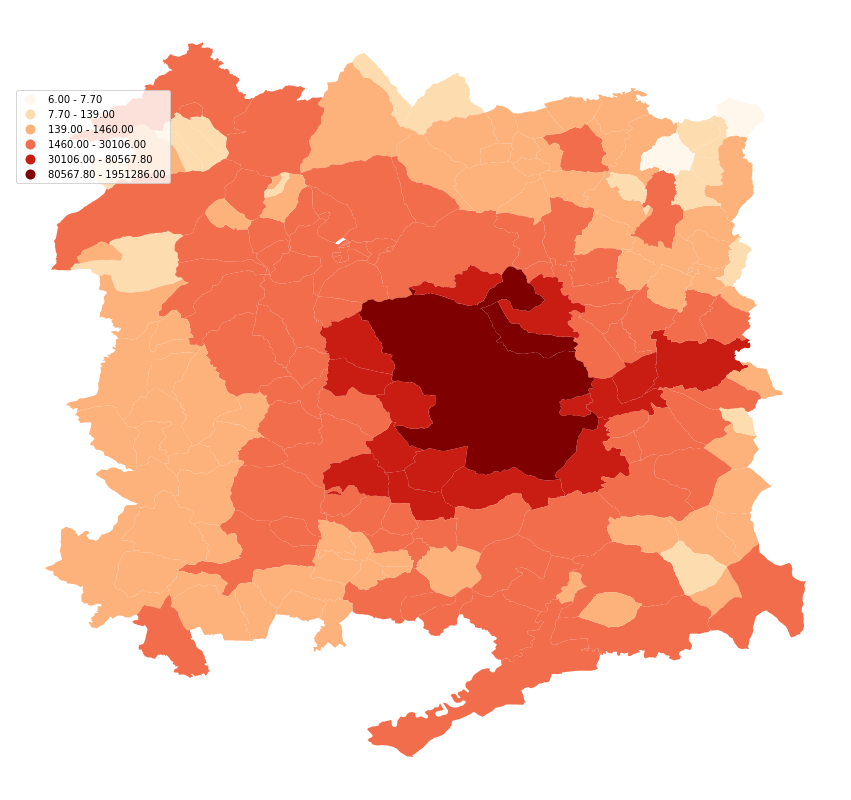

In [12]:
gdf_pop_madrid = gdf_pop.cx[-4.23:-3.32, 40.86:40.12]
ax = gdf_pop_madrid.plot(figsize=(15, 15), column='n_empl_t', scheme='percentiles', legend=True, cmap='OrRd')
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.9))
ax.set_axis_off()

## Geometry operations

### Extract exterior coordinates
Aunque puede parecer algo trivial, muchas veces se necesita extraer las coordenadas de una geometría y usarlas para visualizarla. En el siguiente ejemplo, veremos cómo hacerlo para un polígono y un multipolígono (que es una colección o matriz de polígonos)

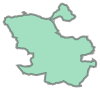

In [13]:
# Selecionamos un unico municipio
plo_ext = gdf_pop_madrid.loc[3305,'geometry']
plo_ext

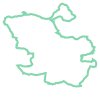

In [14]:
plo_ext.exterior

### Simplify Geometry
La funcion .simplify() permite reducir los vertices de poligonos muy complejos

No handles with labels found to put in legend.


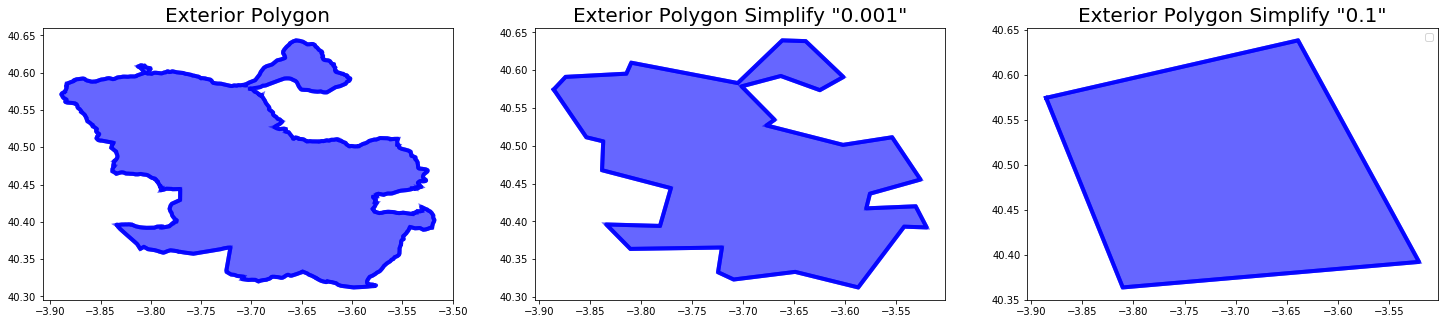

In [15]:
# Simplificamos el poligono para que tenga menos vertices
import matplotlib.pyplot as plt
import numpy as np

plo_ext2 = np.array(plo_ext.exterior)
plo_ext_simplify_ext = np.array(plo_ext.simplify(0.01, preserve_topology=True).exterior)
plo_ext_simplify_ext2 = np.array(plo_ext.simplify(0.1, preserve_topology=True).exterior)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(25,5))
ax1.fill(plo_ext2[:,0], plo_ext2[:,1], c='blue' ,alpha=0.6, linewidth=4)
ax1.plot(plo_ext2[:,0], plo_ext2[:,1], c='blue' ,alpha=0.9, linewidth=4)
ax2.fill(plo_ext_simplify_ext[:,0], plo_ext_simplify_ext[:,1], c='blue' ,alpha=0.6, linewidth=4)
ax2.plot(plo_ext_simplify_ext[:,0], plo_ext_simplify_ext[:,1], c='blue' ,alpha=0.9, linewidth=4)
ax3.fill(plo_ext_simplify_ext2[:,0], plo_ext_simplify_ext2[:,1], c='blue' ,alpha=0.6, linewidth=4)
ax3.plot(plo_ext_simplify_ext2[:,0], plo_ext_simplify_ext2[:,1], c='blue' ,alpha=0.9, linewidth=4)
ax1.set_title('Exterior Polygon',fontsize=20)
ax2.set_title('Exterior Polygon Simplify "0.001"',fontsize=20)
ax3.set_title('Exterior Polygon Simplify "0.1"',fontsize=20)
plt.legend()
plt.show()

### Centroid

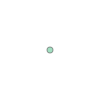

In [16]:
plo_ext_cen=plo_ext.centroid
plo_ext_cen

### Buffer
El análisis de búfer es una tarea importante de geoprocesamiento. Se usa muy frecuentemente en muchos dominios para obtener una distancia alrededor de un punto. En este ejemplo, primero obtendremos el buffer de 1km alrrededor de las farmacias.

Una aspecto importante a la hora de generar el buffer es saber qué CRS/proyección se está utilizando para obtener la salida correcta que desea. Esto es clave ya que para el buffer se indica un distancia que puede estar en metros, grados,.... Pero si se indica las distancia en grados, pero los datos estan en UTM, el resultados no sera correcto.

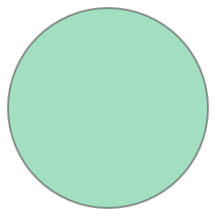

In [17]:
plo_ext_buffer= plo_ext.centroid.buffer(100)
plo_ext_buffer

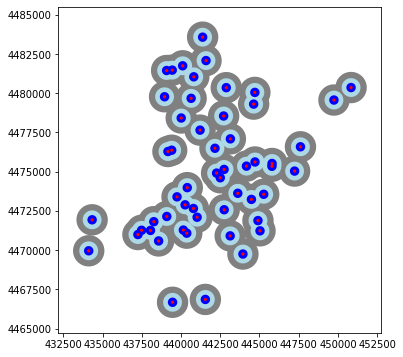

In [18]:
import matplotlib.pyplot as plt

farmacia_madrid = farmacia_madrid.to_crs({'init': 'epsg:32630'})
farmacia_madrid_s = farmacia_madrid.sample(frac=0.03)
# Creamos un buffer de 100, 200 y 500 metros
farmacia_madrid_100 = farmacia_madrid_s.buffer(100)
farmacia_madrid_300 = farmacia_madrid_s.buffer(300)
farmacia_madrid_600 = farmacia_madrid_s.buffer(600)
farmacia_madrid_1000 = farmacia_madrid_s.buffer(1000)

fig, ax = plt.subplots(figsize=(8,6))
farmacia_madrid_1000.plot(ax=ax, color='grey')
farmacia_madrid_600.plot(ax=ax, color='lightblue')
farmacia_madrid_300.plot(ax=ax, color='blue')
farmacia_madrid_100.plot(ax=ax, color='red')

In [19]:
import folium 

# Create map with release incidents and monitoring stations
m = folium.Map(location=[40.42,-3.7], zoom_start=13)
folium.GeoJson(farmacia_madrid_s).add_to(m)
    
folium.GeoJson(farmacia_madrid_1000.to_crs(epsg=4326), style_function=lambda feature: {
        'fillColor': 'grey',
        'color' : 'grey',
        'weight' : 1,
        'fillOpacity' : 0.5,
        }).add_to(m)
folium.GeoJson(farmacia_madrid_600.to_crs(epsg=4326), style_function=lambda feature: {
        'fillColor': 'lightblue',
        'color' : 'lightblue',
        'weight' : 1,
        'fillOpacity' : 0.5,
        }).add_to(m)
folium.GeoJson(farmacia_madrid_300.to_crs(epsg=4326), style_function=lambda feature: {
        'fillColor': 'blue',
        'color' : 'blue',
        'weight' : 1,
        'fillOpacity' : 0.5,
        }).add_to(m)

folium.GeoJson(farmacia_madrid_100.to_crs(epsg=4326), style_function=lambda feature: {
        'fillColor': 'red',
        'color' : 'red',
        'weight' : 1,
        'fillOpacity' : 0.5,
        }).add_to(m)

#m.save("C:/Users/vzaldo/Desktop/html/Farmacias_covid.html")
m

## Spatial Union
Si queremos unir todos los poligonos correspondientes al buffer de 1km podemos hacer un union espacial con la funcion geometry.unary_union.
Asi se colapsan todos lo circulos del buffer en una unica geometria shapely MultiPolygon.

Type: <class 'shapely.geometry.multipolygon.MultiPolygon'>


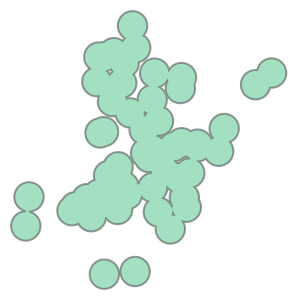

In [20]:
farmacia_madrid_1000_union = farmacia_madrid_1000.geometry.unary_union
print('Type:', type(farmacia_madrid_1000_union))
farmacia_madrid_1000_union

## Vector Overlay

In [21]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
countries = world[world['continent'] == "South America"]
countries = countries[['geometry', 'name']]
countries = countries.to_crs('epsg:3395')
capitals = capitals.to_crs('epsg:3395')

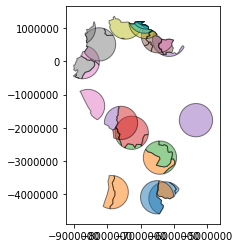

In [22]:
capitals['geometry']= capitals.buffer(500000)
country_cores = gpd.overlay(countries, capitals, how='intersection')
country_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10');

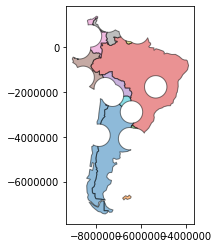

In [23]:
country_peripheries = gpd.overlay(countries, capitals, how='difference')
country_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10');

## Geometry Features

In [24]:
gdf_pop['area'] = gdf_pop['geometry'].apply(lambda g: g.area)
gdf_pop['perimeter'] = gdf_pop['geometry'].apply(lambda g: g.length)
gdf_pop['convex_hull'] = gdf_pop['geometry'].apply(lambda g: g.convex_hull)
gdf_pop['bounding_box'] = gdf_pop['geometry'].apply(lambda g: g.bounds)
gdf_pop.head()

,OBJECTID,MUNI_COD,n_empr_t,n_empl_emp,n_empr_sed,n_empl_e_1,n_empr_suc,n_empl_e_2,n_empl_cat,n_auto,...,n_empl_t,Población,Municipio,Shape__Are,Shape__Len,geometry,area,perimeter,convex_hull,bounding_box
0,1,10904,4,48,4,48,0,0,0,7,...,91,902.0,Tiétar,4.086384e+07,38098.163614,"POLYGON ((-5.51678 39.99765, -5.51691 39.99793...",0.002525,0.295335,"POLYGON ((-5.51099 39.99390, -5.51204 39.99398...","(-5.51843891956717, 39.9939030596612, -5.43933..."
1,2,15006,115,437,75,364,40,73,0,107,...,1136,6041.0,Arzúa,2.901367e+08,106422.709442,"POLYGON ((-8.23500 43.00486, -8.23420 43.00486...",0.017144,0.829259,"POLYGON ((-8.20754 42.84287, -8.21496 42.84625...","(-8.30089762013027, 42.8428740299428, -8.06397..."
2,3,39085,205,1372,143,910,62,462,77,167,...,2270,8782.0,Suances,4.658129e+07,36992.323318,"POLYGON ((-4.09773 43.42650, -4.09760 43.42653...",0.002731,0.290286,"POLYGON ((-4.04637 43.38287, -4.07802 43.39651...","(-4.09772931001912, 43.3828722599332, -4.01489..."
3,4,31258,280,1598,171,1092,109,506,0,148,...,2418,10204.0,Villava/Atarrabia,1.970603e+06,5716.056102,"POLYGON ((-1.61644 42.83452, -1.61634 42.83895...",0.000117,0.044083,"POLYGON ((-1.60787 42.82631, -1.61181 42.82770...","(-1.61644205985599, 42.8263069899195, -1.60290..."
4,5,53081,0,0,0,0,0,0,0,0,...,3,NaN,None,1.376677e+08,85638.670838,"POLYGON ((-2.27344 42.74187, -2.27326 42.74299...",0.008161,0.679914,"POLYGON ((-2.12754 42.65611, -2.12890 42.65643...","(-2.27343685994737, 42.6561073300969, -2.09974..."


## Geocoding
Muchos datos disponibles en tablas CSV o XLS, no presentan las coordenadas latitud longitud necesarias para la analítica espacial, por tanto, en este caso es necesario un proceso de geocodificación previo para poder realizar toda la analítica geoespacial. Estos datos suelen tener columna de dirección, por lo que, debe convertir sus datos a un formato geográfico. La geocodificación es el proceso computacional de transformar una descripción de dirección física en una ubicación en la superficie de la Tierra (representación espacial en coordenadas numéricas).


In [25]:
import pandas as pd
import geopandas as gpd 
import geopy

In [31]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="GoogleV3")
indra="Avenida de Bruselas, Madrid, Alcobendas, 35"
location = geolocator.geocode(indra)
location

Location(Avenida de Bruselas, La Moraleja, Alcobendas, Área metropolitana de Madrid y Corredor del Henares, Comunidad de Madrid, 28108, España, (40.5310069, -3.6316848, 0.0))

In [32]:
print((location.latitude, location.longitude))

(40.5310069, -3.6316848)


## Reverse Geocoding

In [34]:
location = geolocator.reverse("40.5310069, -3.6316848")
print(location.address)

Avenida de Bruselas, La Moraleja, Alcobendas, Área metropolitana de Madrid y Corredor del Henares, Comunidad de Madrid, 28108, España


## Distance
Geopy puede calcular también la distancia geodésica entre dos puntos utilizando la función geopy.distance.distance.

In [35]:
from geopy.distance import geodesic
Minsait = (40.5310069, -3.6316848)
Psol = (40.41, -3.70)
print(geodesic(Minsait, Psol).kilometers, "Km")

14.632789940270195 Km


In [30]:
del gdf_comercio
del gdf_framacia
del gdf_pop
del gdf_pop_merge
del census_2011